Automatically created module for IPython interactive environment
XX Shape is  (79, 56)  YY shape is  (79, 56)
X Shape is (150, 2)  Labels shape is  (150,)
X is  <class 'numpy.ndarray'>
Labels are  <class 'numpy.ndarray'>
Z Shape (79, 56)


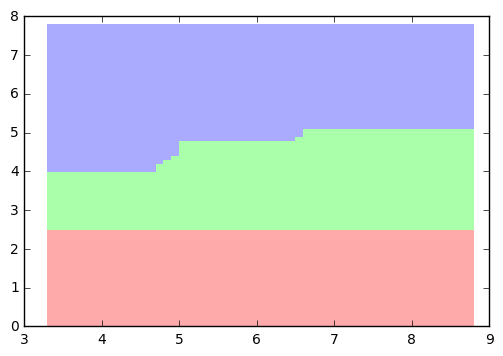

In [12]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

print('XX Shape is ', xx.shape, ' YY shape is ', yy.shape)
print('X Shape is' , X.shape, ' Labels shape is ', y.shape)
print('X is ', type(X)) 
print('Labels are ', type(y))

    

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print('Z Shape', Z.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.show()